# Свертки 1D

Сигнал, который мы обрабатываем при помощи сверточного слоя, не обязательно должен быть картинкой и не обязательно он должен быть двумерным.

В качестве примера такого сигнала может выступать звук:

In [ ]:
import torchaudio

dataset = torchaudio.datasets.YESNO("./", download=True)

100%|██████████| 4.49M/4.49M [00:00<00:00, 6.37MB/s]


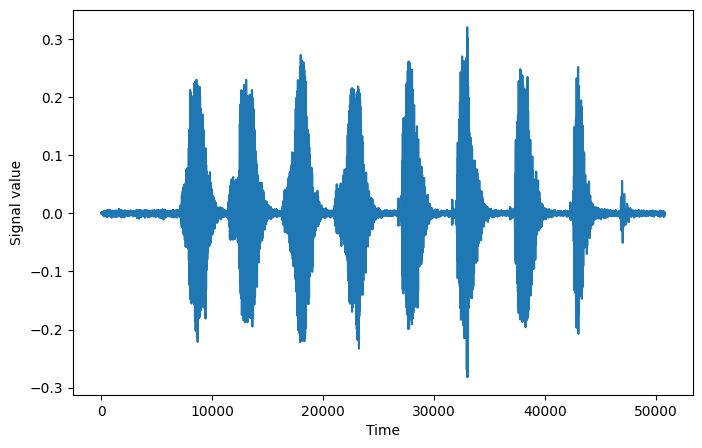

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.xlabel("Time")
plt.ylabel("Signal value")

waveform, sample_rate, label = dataset[0]

plt.plot(waveform.flatten())
plt.show()

В PyTorch одномерная свертка задается аналогично двумерной — `torch.nn.Conv1d` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html):

```
torch.nn.Conv1d(in_channels, out_channels,             kernel_size, stride=1,  padding=0, ...)
```

Одномерная операция свертки используется для данных, имеющих последовательную структуру: текстов, аудиозаписей, цифровых сигналов. Как правило, такую структуру можно представить в виде изменения величины с течением времени.

In [ ]:
from torch import nn

conv = nn.Conv1d(1, 16, 3, stride=2)
output = conv(waveform)
print(output.shape)

torch.Size([16, 25399])


Но такой сигнал чаще преобразуют в спектрограмму, а к ней уже можно применить 2D-свёртку:

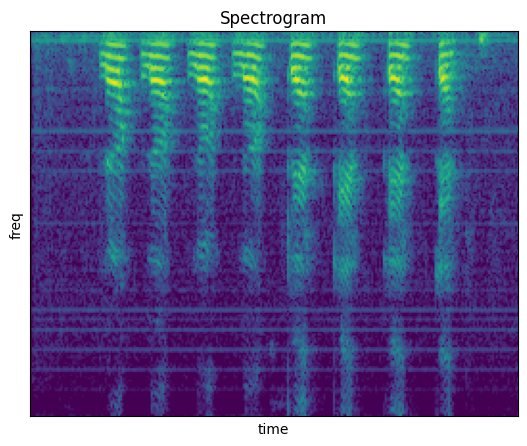

In [ ]:
import librosa
from torchaudio.transforms import Spectrogram


spec_obj = Spectrogram(power=2, center=True, pad_mode="reflect")
spec = spec_obj(waveform[0])

plt.figure(figsize=(7, 5))
plt.imshow(librosa.power_to_db(spec))
plt.title("Spectrogram")
plt.xlabel("time")
plt.ylabel("freq")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

# Свертки 3D

Двумерная операция свертки, применяется для обработки данных, имеющих пространственную структуру, то есть тех данных, для которых играют роль взаимные расположения по двум осям. Совсем не обязательно, чтобы эти оси соответствовали высоте и ширине картинки. Например, одна ось может соответствовать координате сенсора в одномерной матрице, а вторая — времени получения информации с него.

Трёхмерная операция свертки используется, когда данные имеются три независимых "пространственных" компоненты.

Простейшим примером является видео: к двумерной структуре самих изображений добавляется координата времени.

<img src ="https://ml.gan4x4.ru/msu/dev-2.2/L06/out/3d_convolution.png" width="600">





```
 torch.nn.Conv3d(in_channels,
                  out_channels,
                  kernel_size,
                  stride=1,
                  padding=0,
                  dilation=1,
                  groups=1,
                  bias=True,
                  padding_mode='zeros')

```



In [ ]:
import torch
from torch import nn

# With cubic kernels and same stride
conv = nn.Conv3d(in_channels=16, out_channels=33, kernel_size=3, stride=2)

# non-square kernels with unequal stride and padding
conv = nn.Conv3d(
    in_channels=16,
    out_channels=33,
    kernel_size=(3, 5, 2),
    stride=(2, 1, 1),
    padding=(4, 2, 0),
)

input = torch.randn(20, 16, 10, 50, 100)
out = conv(input)

print("out shape: ", out.shape)

out shape:  torch.Size([20, 33, 8, 50, 99])
